✅ Dataset loaded successfully with 1372 rows


c:\Users\QC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6451 - loss: 0.6362 - val_accuracy: 0.8773 - val_loss: 0.5057
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8754 - loss: 0.4574 - val_accuracy: 0.9364 - val_loss: 0.3255
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9517 - loss: 0.2626 - val_accuracy: 0.9409 - val_loss: 0.1757
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9612 - loss: 0.1458 - val_accuracy: 0.9818 - val_loss: 0.0933
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9799 - loss: 0.0813 - val_accuracy: 0.9864 - val_loss: 0.0587
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9798 - loss: 0.0624 - val_accuracy: 0.9955 - val_loss: 0.0422
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9809 - loss: 0.0501 - val_accuracy: 0.9955 - val_loss: 0.0325
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9859 - loss: 0.0425 - val_accura

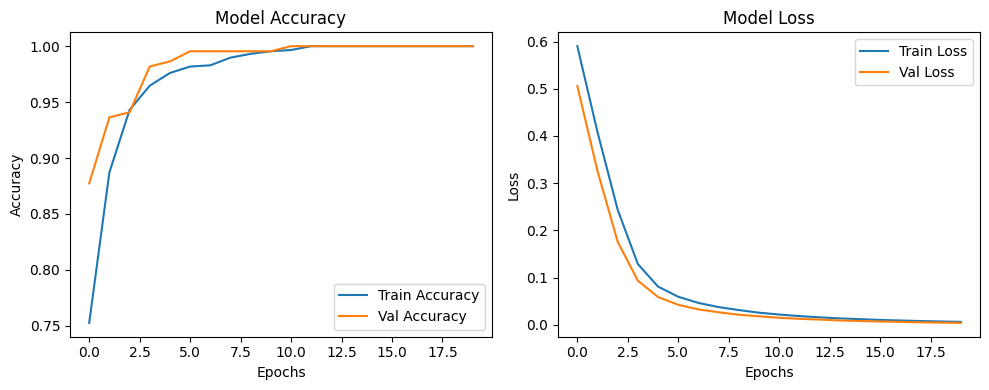

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📊 Confusion Matrix:
[[148   0]
 [  0 127]]

🧾 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       148
         1.0       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



c:\Users\QC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step

Prediction Score: 0.00010787515
Predicted Class: Authentic 🏦


In [4]:
# bank_note_classification_tensorflow.py

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import requests

# 1️⃣ Download and load dataset directly from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
response = requests.get(url)
response.raise_for_status()

# Parse dataset
data_lines = response.text.strip().split("\n")
data = [list(map(float, line.split(","))) for line in data_lines]

# Create DataFrame
columns = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.DataFrame(data, columns=columns)
print(f"✅ Dataset loaded successfully with {len(df)} rows")

# 2️⃣ Split features and target
X = df.drop("class", axis=1)
y = df["class"]

# 3️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Build the Neural Network
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 6️⃣ Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7️⃣ Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

# 8️⃣ Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 9️⃣ Plot accuracy and loss
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 🔟 Confusion Matrix & Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# 1️⃣1️⃣ Example prediction
sample = np.array([[3.6216, 8.6661, -2.8073, -0.44699]])  # Example note features
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("\nPrediction Score:", prediction[0][0])
print("Predicted Class:", "Fake 💵" if prediction > 0.5 else "Authentic 🏦")

